In [1]:
import numpy as np
import scipy
from scipy import special
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
plt.style.use('seaborn-pastel')
import time

<IPython.core.display.Javascript object>


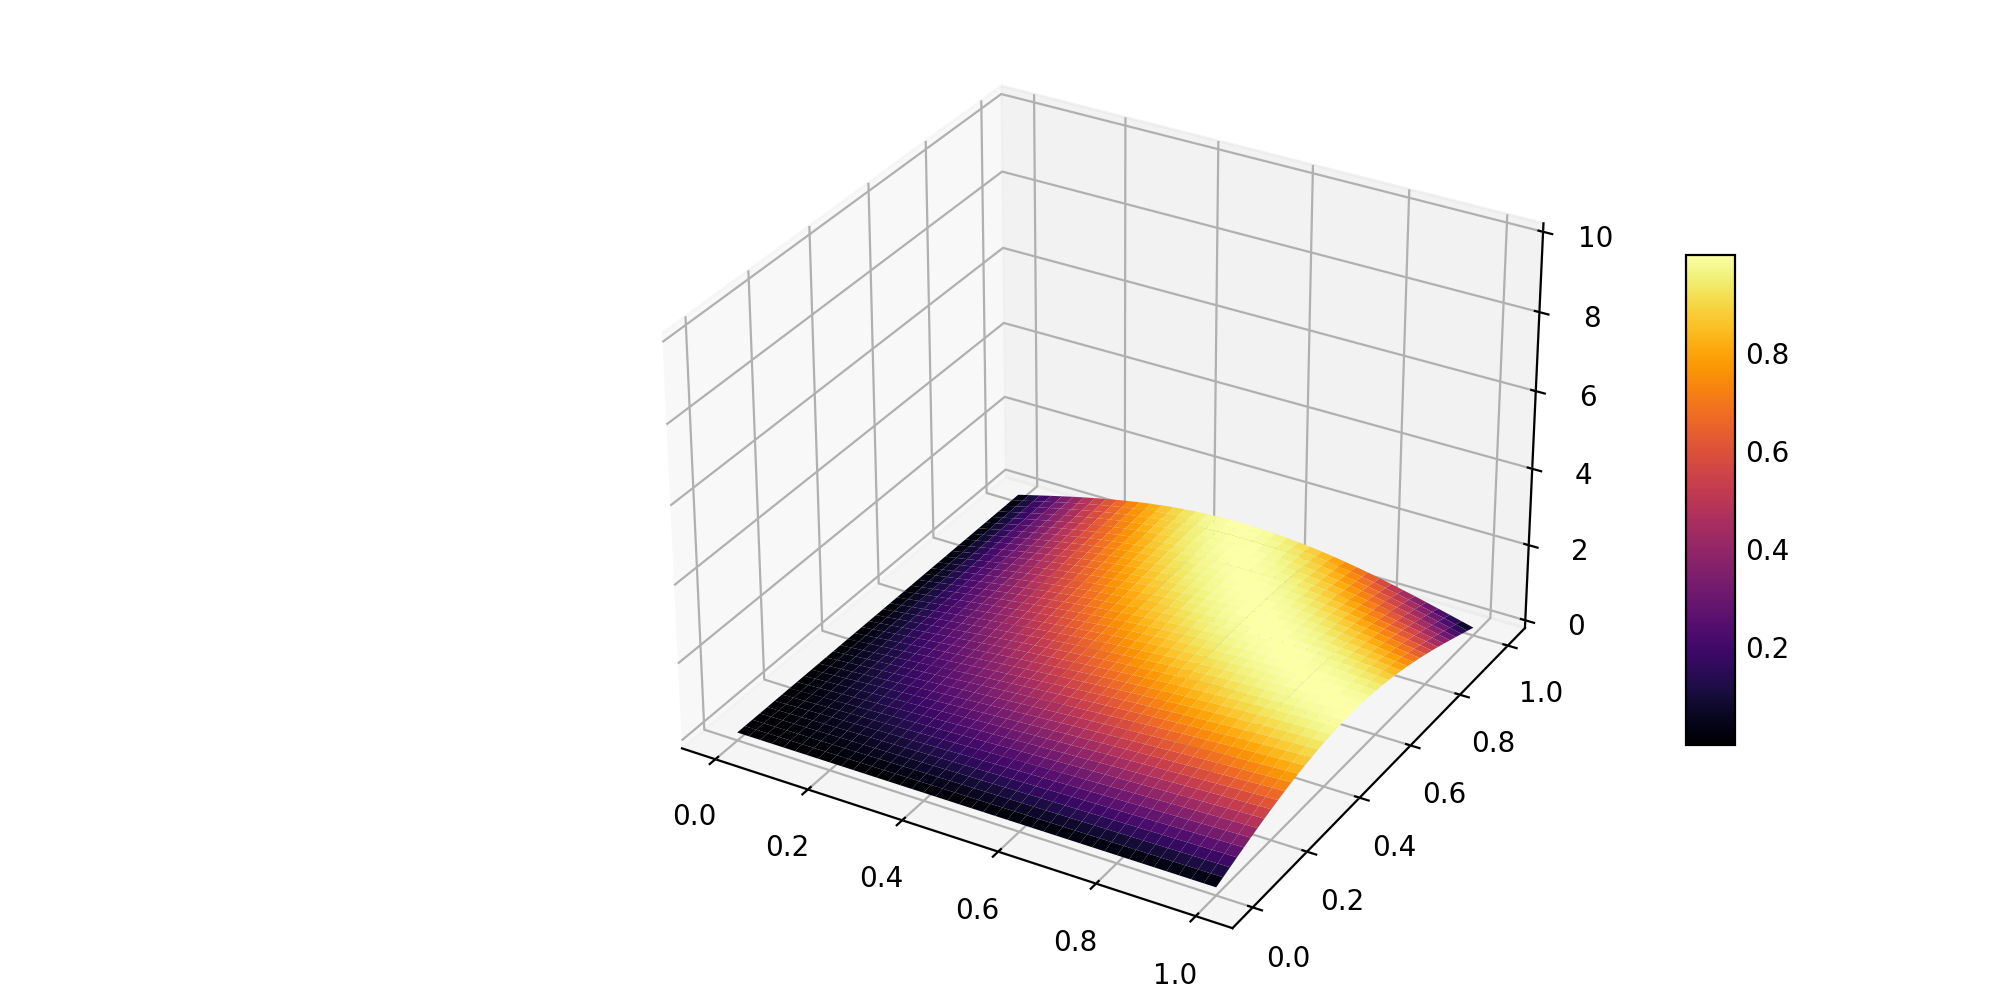

In [4]:
#4-ая задача
L_x = L_y = 1
N = 40
h = L_x / N
x_i = np.arange(0, L_x + L_x/N, L_x / N)
y_j = np.arange(0, L_y + L_y / N, L_y/N)
m = np.zeros([N+1, N+1])
u_anal = np.zeros([N+1, N+1])
u = np.zeros([N+1, N+1])
def f(x, y):
    return np.pi**2 * (y**2+ x**2)*np.sin(np.pi*x*y)
for i in range(N+1):
    for j in range(N+1):
        m[i][j] = i + 1 + j * (N + 1)
        u_anal[i][j] = np.sin(np.pi*x_i[i]*y_j[j])
z = np.zeros([2, (N+1)**2])
for i in range(N+1):
    for j in range(N+1):
        num = int(m[i][j])
        z[0][num-1] = x_i[i]
        z[1][num-1] = y_j[j]

l = np.zeros([3, 2*N**2])
F = np.zeros([3, 2*N**2])
for i in range(N):
    for j in range(N):
        k_1 = 2 * i + 1 + j * 2 * N
        k_2 = 2 * i + 2 + j * 2 * N
        l[0][k_1-1] = i + 2 + (j+1) * (N + 1)
        l[1][k_1-1] = l[0][k_1-1] - 1
        l[2][k_1-1] = l[0][k_1-1] - N - 1
        l[0][k_2-1] = i + 1 + j*(N + 1)
        l[1][k_2-1] = l[0][k_2-1] + 1
        l[2][k_2-1] = l[0][k_2-1] + N + 1
for i in range(N):
    for j in range(N):
        k_1 = 2 * i + 1 + j * 2 * N
        k_2 = 2 * i + 2 + j * 2 * N
        F[0][k_1-1] = h**2 * f(z[0][int(l[0][k_1-1])-1], z[1][int(l[0][k_1-1])-1])  / 6
        F[1][k_1-1] = h**2 * f(z[0][int(l[1][k_1-1])-1], z[1][int(l[1][k_1-1])-1])  / 6
        F[2][k_1-1] = h**2 * f(z[0][int(l[2][k_1-1])-1], z[1][int(l[2][k_1-1])-1])  / 6
        F[0][k_2-1] = h**2 * f(z[0][int(l[0][k_2-1])-1], z[1][int(l[0][k_2-1])-1])  / 6
        F[1][k_2-1] = h**2 * f(z[0][int(l[1][k_2-1])-1], z[1][int(l[1][k_2-1])-1])  / 6
        F[2][k_2-1] = h**2 * f(z[0][int(l[2][k_2-1])-1], z[1][int(l[2][k_2-1])-1])  / 6
    
gamma = np.asarray([[1, -0.5, -0.5], [-0.5, 0.5, 0], [-0.5, 0, 0.5]])
F_new = np.zeros((N+1)**2)
for i in range(N):
    for j in range(N):
        k_1 = 2 * i + 1 + j * 2 * N
        k_2 = 2 * i + 2 + j * 2 * N
        F_new[int(l[0][k_1-1])-1] += F[0][k_1-1]
        F_new[int(l[1][k_1-1])-1] += F[1][k_1-1]
        F_new[int(l[2][k_1-1])-1] += F[2][k_1-1]
        F_new[int(l[0][k_2-1])-1] += F[0][k_2-1]
        F_new[int(l[1][k_2-1])-1] += F[1][k_2-1]
        F_new[int(l[2][k_2-1])-1] += F[2][k_2-1]

A = np.zeros([(N+1)**2, (N+1)**2])
for i in range(N):
    for j in range(N):
        k_1 = 2 * i + 1 + j * 2 * N
        k_2 = 2 * i + 2 + j * 2 * N
        for q in range(3):
            for p in range(3):
                A[int(l[q][k_1-1])-1][int(l[p][k_1-1])-1] += gamma[q][p]
                A[int(l[q][k_2-1])-1][int(l[p][k_2-1])-1] += gamma[q][p]
#определяем граничные узлы и подравляем матрицу F_new
for i in range(N+1):
    for j in range(N+1):
        uzel = int(m[i][j])
        if x_i[i] == 0:
            F_new[uzel-1] = 0
            A[uzel-1] = 0
            A[uzel - 1][uzel -1] = 1
        if y_j[j] == 0:
            F_new[uzel-1] = 0
            A[0:(N+1)**2][uzel-1] = 0
            A[uzel-1][uzel-1] = 1
        if x_i[i] == 1:
            F_new[uzel-1] = np.sin(np.pi * y_j[j])
            A[uzel-1] = 0
            A[uzel - 1][uzel -1] = 1
        if y_j[j] == 1:
            F_new[uzel-1] = np.sin(np.pi * x_i[i])
            A[0:(N+1)**2][uzel-1] = 0
            A[uzel-1][uzel-1] = 1

u_uzel = np.linalg.solve(A, F_new)
for i in range(N+1):
    for j in range(N+1):
        uzel = int(m[i][j])
        u[i][j] = u_uzel[uzel-1]
plt.style.use('_mpl-gallery')
fig = plt.figure(figsize=(10, 5))
axes = fig.add_subplot(projection='3d')
axes.set_zlim(0, 10)
#ax_3d = Axes3D(fig)
xgrid, ygrid = np.meshgrid(x_i, y_j)
surf = axes.plot_surface(xgrid, ygrid, u, cmap='inferno')
#axes.set_zlim(0, 100)
plt.rcParams['axes.grid'] = False
fig.colorbar(surf, shrink = 0.5, aspect = 10)
plt.show()

In [2]:
def test(N):
    L_x = L_y = 1
    h = L_x / N
    x_i = np.arange(0, L_x + L_x/N, L_x / N)
    y_j = np.arange(0, L_y + L_y / N, L_y/N)
    m = np.zeros([N+1, N+1])
    u_anal = np.zeros([N+1, N+1])
    u = np.zeros([N+1, N+1])
    def f(x, y):
        return np.pi**2 * (y**2+ x**2)*np.sin(np.pi*x*y)
    for i in range(N+1):
        for j in range(N+1):
            m[i][j] = i + 1 + j * (N + 1)
            u_anal[i][j] = np.sin(np.pi*x_i[i]*y_j[j])
    z = np.zeros([2, (N+1)**2])
    for i in range(N+1):
        for j in range(N+1):
            num = int(m[i][j])
            z[0][num-1] = x_i[i]
            z[1][num-1] = y_j[j]

    l = np.zeros([3, 2*N**2])
    F = np.zeros([3, 2*N**2])
    for i in range(N):
        for j in range(N):
            k_1 = 2 * i + 1 + j * 2 * N
            k_2 = 2 * i + 2 + j * 2 * N
            l[0][k_1-1] = i + 2 + (j+1) * (N + 1)
            l[1][k_1-1] = l[0][k_1-1] - 1
            l[2][k_1-1] = l[0][k_1-1] - N - 1
            l[0][k_2-1] = i + 1 + j*(N + 1)
            l[1][k_2-1] = l[0][k_2-1] + 1
            l[2][k_2-1] = l[0][k_2-1] + N + 1
    for i in range(N):
        for j in range(N):
            k_1 = 2 * i + 1 + j * 2 * N
            k_2 = 2 * i + 2 + j * 2 * N
            F[0][k_1-1] = h**2 * f(z[0][int(l[0][k_1-1])-1], z[1][int(l[0][k_1-1])-1])  / 6
            F[1][k_1-1] = h**2 * f(z[0][int(l[1][k_1-1])-1], z[1][int(l[1][k_1-1])-1])  / 6
            F[2][k_1-1] = h**2 * f(z[0][int(l[2][k_1-1])-1], z[1][int(l[2][k_1-1])-1])  / 6
            F[0][k_2-1] = h**2 * f(z[0][int(l[0][k_2-1])-1], z[1][int(l[0][k_2-1])-1])  / 6
            F[1][k_2-1] = h**2 * f(z[0][int(l[1][k_2-1])-1], z[1][int(l[1][k_2-1])-1])  / 6
            F[2][k_2-1] = h**2 * f(z[0][int(l[2][k_2-1])-1], z[1][int(l[2][k_2-1])-1])  / 6

    gamma = np.asarray([[1, -0.5, -0.5], [-0.5, 0.5, 0], [-0.5, 0, 0.5]])
    F_new = np.zeros((N+1)**2)
    for i in range(N):
        for j in range(N):
            k_1 = 2 * i + 1 + j * 2 * N
            k_2 = 2 * i + 2 + j * 2 * N
            F_new[int(l[0][k_1-1])-1] += F[0][k_1-1]
            F_new[int(l[1][k_1-1])-1] += F[1][k_1-1]
            F_new[int(l[2][k_1-1])-1] += F[2][k_1-1]
            F_new[int(l[0][k_2-1])-1] += F[0][k_2-1]
            F_new[int(l[1][k_2-1])-1] += F[1][k_2-1]
            F_new[int(l[2][k_2-1])-1] += F[2][k_2-1]

    A = np.zeros([(N+1)**2, (N+1)**2])
    for i in range(N):
        for j in range(N):
            k_1 = 2 * i + 1 + j * 2 * N
            k_2 = 2 * i + 2 + j * 2 * N
            for q in range(3):
                for p in range(3):
                    A[int(l[q][k_1-1])-1][int(l[p][k_1-1])-1] += gamma[q][p]
                    A[int(l[q][k_2-1])-1][int(l[p][k_2-1])-1] += gamma[q][p]
    #определяем граничные узлы и подравляем матрицу F_new
    for i in range(N+1):
        for j in range(N+1):
            uzel = int(m[i][j])
            if x_i[i] == 0:
                F_new[uzel-1] = 0
                A[uzel-1] = 0
                A[uzel - 1][uzel -1] = 1
            if y_j[j] == 0:
                F_new[uzel-1] = 0
                A[0:(N+1)**2][uzel-1] = 0
                A[uzel-1][uzel-1] = 1
            if x_i[i] == 1:
                F_new[uzel-1] = np.sin(np.pi * y_j[j])
                A[uzel-1] = 0
                A[uzel - 1][uzel -1] = 1
            if y_j[j] == 1:
                F_new[uzel-1] = np.sin(np.pi * x_i[i])
                A[0:(N+1)**2][uzel-1] = 0
                A[uzel-1][uzel-1] = 1

    u_uzel = np.linalg.solve(A, F_new)
    for i in range(N+1):
        for j in range(N+1):
            uzel = int(m[i][j])
            u[i][j] = u_uzel[uzel-1]
    return np.amax(abs(u_anal - u))


In [4]:
norm_1 = test(30)
norm_2 = test(60)
norm = np.log(norm_1 / norm_2) / np.log(2)
print(norm)

1.9972001687097425
